# Introdução à Métodos Computacionais de Otimização

**Def. (Algoritmo):** Um algoritmo é uma coleção de instruções para realizar alguma tarefa específica. Segundo Donald Knuth (The Art of Computer Programming, v.1), ele deve satisfazer as seguintes condições, parafraseadas aqui:
- **Finitude:** O algoritmo deve acabar em tempo finito;
- **Bem definido:** As intruções devem ser claras e sem ambiguidade;
- **Entrada:** O algoritmo tem zero ou mais entradas, que são valores determinados antes do algoritmo começar. Essas entradas são especificados a partir de conjuntos de objetos;
- **Saída:** O algoritmo tem uma ou mais saídas, que são quantidades relacionadas com as entradas;
- **Eficácia/Computabilidade:** As operações feitas no algoritmo devem ser suficientemente básicas para que a princípio possam ser executadas por uma pessoa num espaço finito e tempo finito com papel e caneta.

Um **método** é menos restrito, e uma **implementação** é a realização computacional de um algoritmo.

Pode-se dizer que, dado um problema, existem vários métodos para resolvê-lo, para cada método, existem vários algoritmos que o usam, para cada algoritmo, várias implementações.

# Condições de paradas

Um algoritmo de otimização será um algoritmo com o objetivo de encontrar pontos críticos de um problema informado pelo usuário. Alguns algoritmos podem verificar condições de segunda ordem, mas em geral estaremos olhando apenas para as condições de primeira ordem. No caso irrestrito continuamente diferenciável, isso quer dizer $\nabla f(\overline{x}) = 0$. Essa condição precisa ser relaxada para obtermos uma condição razoável de parada de sucesso, isto é, uma condição que diz que o ponto encontrado está suficientemente próximo de ser um ponto crítico do problema. Para tanto, utilizaremos uma *tolerância* para a condição de primeira ordem: Buscaremos um ponto onde o gradiente está suficientemente próximo de zero, por exemplo verificando
$\Vert \nabla f(x_k)\Vert < \varepsilon$ ou
$\Vert \nabla f(x_k)\Vert < \varepsilon \Vert \nabla f(x_0)\Vert$, ou ainda, uma combinação das duas:
$$\Vert \nabla f(x_k)\Vert < \varepsilon_a + \varepsilon_r \Vert \nabla f(x_0)\Vert.$$

Os métodos de otimização costumam ter alguma garantia de convergência perto da solução, ou em alguns casos, de gerar pontos de acumulação críticos. No entanto, pode acontecer de o método demorar demais na busca de uma solução, ou de encontrar um obstáculo que não pode ultrapassar. Para evitar que o seu programa tenha um *bug*, é preciso uma combinação de entendimento computacional e teórico do algoritmo para criar condições de parada adicionais. As mais comuns estão a seguir:

- Máximo de iterações, de avaliação de funções, de tempo decorrido, etc.
- Insatisfação de alguma condição teórica para o funcionamento do método, e.g., positividade da Hessiana em Newton, geração de uma direção que não seja de descida;
- Acontecimento computacional que não deveria acontecer na matemática exata, mas que ocorre devido ao uso de ponto flutuante, .e.g, má condicionamento da Hessiana, o passo de Armijo vira zero, divisão por algum número muito próximo de zero, a direção fica muito perto de ser ortogonal;
- Acontecimentos puramente computacionais, e.g., falta de memória;

Muitos problemas só são percebidos após a implementação é iniciada, por isso é preciso ficar atento e implementar testes para o seu código.

## Indicador de Saída - Exit Flag

O comum nessas situações de parada é indicar com alguma variável o que aconteceu. No passado, o costume era retornar $0$ se tudo correu bem, $>0$ para paradas previstas, e $<0$ para exceções.
Hoje em dia podemos retornar texto descrevendo a saída, por exemplo, `"sucesso"`, `"máximo de iterações"`, `"máximo de tempo"`, etc.

## Método de Newton Puro

1. Dados $x_0$, $\varepsilon > 0$, $k = 0$, $k_\max$.
2. Enquanto $\Vert\nabla f(x_k)\Vert > \varepsilon$
    1. Calcule $d_k$ resolvendo o sistema $\nabla^2 f(x_k) d = -\nabla f(x_k)$
    2. Calcule $x_{k+1} = x_k + d_k$
    3. $k = k + 1$
    4. Teste outras condições de parada e vá à 4 se alguma for satisfeita
3. Fim do Enquanto
4. Saída: $x_k$, $f(x_k)$, $\Vert\nabla f(x_k)\Vert$, Tempo, Iterações, exitflag

In [1]:
f(x) = (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2
g(x) = [2 * (x[1] - 1) - 400 * x[1] * (x[2] - x[1]^2);
         200 * (x[2] - x[1]^2)]
H(x) = [2 - 400 * (x[2] - x[1]^2) + 800 * x[1]^2   -400 * x[1];
        -400 * x[1]  200]

# Ponto inicial
x = [-1.2; 1.0]

2-element Array{Float64,1}:
 -1.2
  1.0

In [2]:
f(x)

24.199999999999996

In [3]:
g(x)

2-element Array{Float64,1}:
 -215.6
  -88.0

In [4]:
H(x)

2×2 Array{Float64,2}:
 1330.0  480.0
  480.0  200.0

In [5]:
using Plots
gr()

Plots.GRBackend()

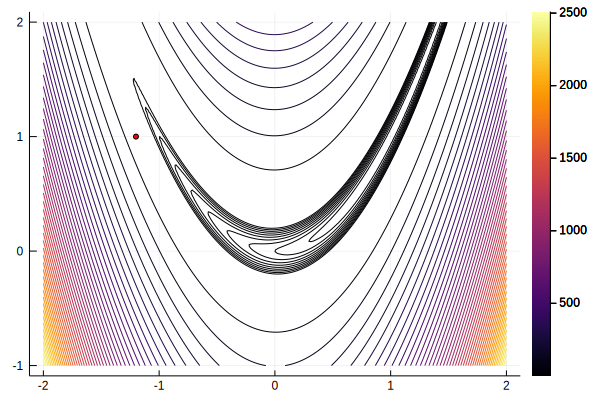

In [6]:
contour(linspace(-2, 2, 200), linspace(-1, 2, 200), (x,y) -> f([x;y]), levels=0:0.5:5.0)
contour!(linspace(-2, 2, 200), linspace(-1, 2, 200), (x,y) -> f([x;y]), levels=50)
scatter!([x[1]], [x[2]], c=:red, ms=3, leg=false)

In [7]:
d = -H(x) \ g(x)

2-element Array{Float64,1}:
 0.0247191
 0.380674 

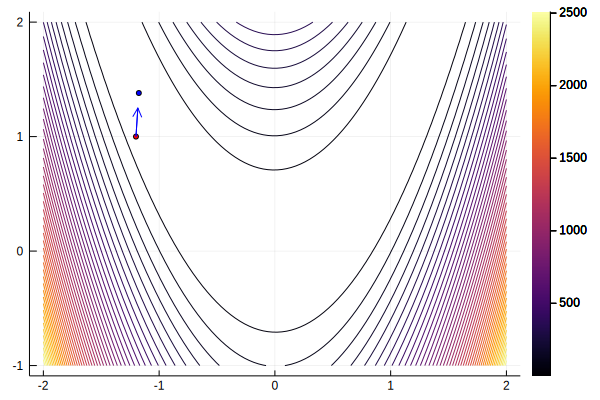

In [8]:
contour(linspace(-2, 2, 100), linspace(-1, 2, 100), (x,y) -> f([x;y]), levels=50)
scatter!([x[1]], [x[2]], c=:red, ms=3, leg=false)
dn = 0.25 * d / norm(d)
plot!([x[1], x[1] + dn[1]], [x[2], x[2] + dn[2]], c=:blue, l=:arrow)
scatter!([x[1] + d[1]], [x[2] + d[2]], c=:blue, ms=3)

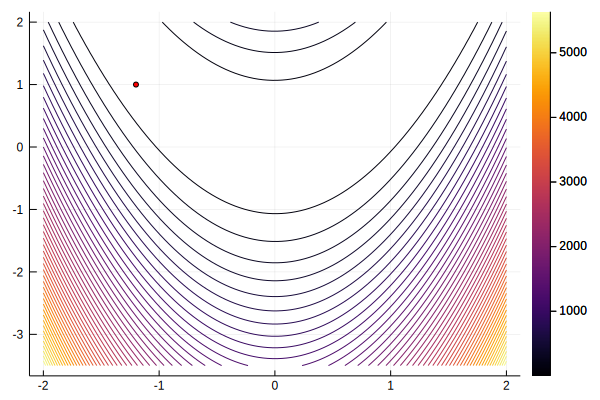

In [9]:
x = [-1.2; 1.0]
contour(linspace(-2, 2, 100), linspace(-3.5, 2, 100), (x,y) -> f([x;y]), levels=50)
scatter!([x[1]], [x[2]], c=:red, ms=3, leg=false)

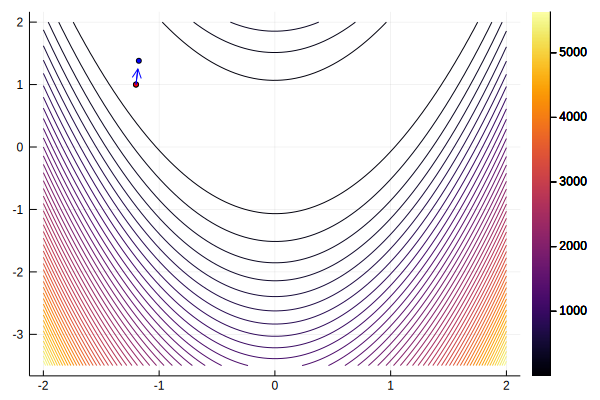

In [10]:
scatter!([x[1]], [x[2]], c=:red, ms=3)
d = -H(x) \ g(x)
dn = 0.25 * d / norm(d)
plot!([x[1], x[1] + dn[1]], [x[2], x[2] + dn[2]], c=:blue, l=:arrow)
x = x + d
scatter!([x[1]], [x[2]], c=:blue, ms=3)

In [11]:
function newton_puro(f, g, H, x;
                     tol = 1e-6, kmax = 1000, max_evals = 10_000,
                     max_time = 30.0
                    )
    n = length(x)
    p = plot() # Vazio, senão dá erro
    if n == 2
        p = contour(linspace(-2, 2, 100), linspace(-3.5, 2, 100), (x,y) -> f([x;y]), levels=50)
        scatter!(p, [x[1]], [x[2]], c=:red, ms=3, leg=false)
    end
    t0 = time()
    Dt = 0.0
    k = 0
    gx = g(x)
    
    sucesso = norm(gx) < tol
    cansado = k > kmax || Dt > max_time
    
    while !(sucesso || cansado)
        d = -H(x) \ gx
        if n == 2
            plot!([x[1]; x[1] + d[1]], [x[2]; x[2] + d[2]], c=:blue)
        end
        x = x + d
        gx = g(x)
        k = k + 1
        Dt = time() - t0 # Tempo decorrido
        sucesso = norm(gx) < tol
        cansado = k > kmax || Dt > max_time
        if n == 2
            scatter!(p, [x[1]], [x[2]], c=:red, ms=3)
        end
    end
    exitflag = "desconhecido"
    if sucesso
        exitflag = "sucesso"
    elseif cansado
        if k > kmax
            exitflag = "max iter"
        elseif Dt > max_time
            exitflag = "max tempo"
        end
    end
    
    return x, f(x), norm(gx), Dt, k, exitflag, p
end

newton_puro (generic function with 1 method)

In [12]:
f(x) = (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2
g(x) = [2 * (x[1] - 1) - 400 * x[1] * (x[2] - x[1]^2);
         200 * (x[2] - x[1]^2)]
H(x) = [2 - 400 * (x[2] - x[1]^2) + 800 * x[1]^2   -400 * x[1];
        -400 * x[1]  200]

# Ponto inicial
x = [-1.2; 1.0]
x, fx, ngx, Dt, k, ef, p = newton_puro(f, g, H, x)

([1.0, 1.0], 3.4326461875363225e-20, 8.285705791275366e-9, 0.004064083099365234, 6, "sucesso", Plot{Plots.GRBackend() n=14})

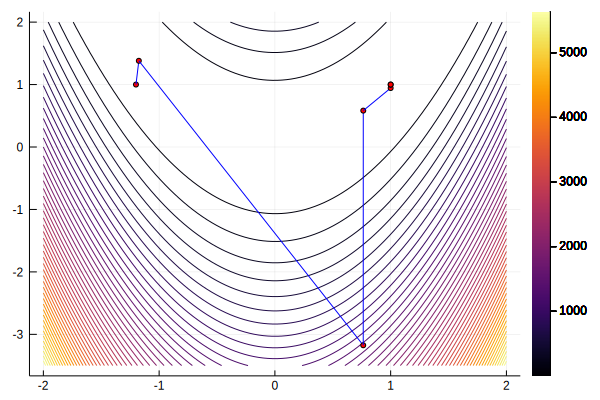

In [13]:
p

In [14]:
f(x) = x[1]^4 + x[2]^4 + x[3]^4
g(x) = 4 * [x[1]^3; x[2]^3; x[3]^3]
H(x) = 12 * [x[1]^2  0.0  0.0; 0.0  x[2]^2  0.0; 0.0 0.0 x[3]^2]
x = ones(3)
x, fx, ngx, Dt, k, ef, p = newton_puro(f, g, H, x)

([0.00513823, 0.00513823, 0.00513823], 2.091104727311945e-9, 9.398564268284368e-7, 0.016389846801757812, 13, "sucesso", Plot{Plots.GRBackend() n=0})

## Coletâneas de problemas

Quando algoritmos eram criados há algumas décadas, era necessário criar também algumas funções para comparar esses algoritmos. Essas funções costumavam ser comparilhadas entre autores, para que todos pudessem fazer testes computacionais. Alguns artigos foram publicados descrevendo conjuntos de problemas que poderiam ser úteis em contextos específicos. Eis alguns:
- W. Hock, K. Schittkowski. **Test Examples for Nonlinear Programming Codes**, Springer, 1981
- Jorge J. Moré, Burton S. Garbow, and Kenneth E. Hillstrom. 1981. **Testing Unconstrained Optimization Software.** ACM Trans. Math. Softw. 7, 1 (1981), 17-41. DOI: https://doi.org/10.1145/355934.355936

Em 1995, com a publicação

- I. Bongartz, A. R. Conn, N. I. M. Gould, and Ph. L. Toint. CUTE: Constrained
and Unconstrained Testing Environment. ACM Transactions on Mathematical
Software, 21(1):123–160, 1995.

vários problemas foram colecionados num software que dava acesso à todas as qualidades de um problema de programação não-linear: função objetivo, restrições, gradientes, Hessianas, ponto inicial, etc. Essa biblioteca de testes, **CUTE** teve duas versões seguintes: **CUTEr** e **CUTEst**. Esta última, a mais atual, têm uma interface em Julia, que podemos acessar sem muita dificuldade.

### NLPModels.jl e CUTEst.jl

Vamos utilizar dois pacotes, parte do [JuliaSmoothOptimizers](https://github.com/JuliaSmoothOptimizers/), para criar/obter nossas funções $f$, $\nabla f$ e $\nabla^2 f$.

**NLPModels.jl** é um pacote para abstração de modelos de PNL. Em particular, um modelo que nos interessa é o `ADNLPModel`, que vai receber $f$ e calcular $\nabla f$ e $\nabla^2 f$ para nós.

In [15]:
using NLPModels

f(x) = (x[1] - 1)^2 + 100 * (x[2] - x[1]^2)^2

nlp = ADNLPModel(f, [-1.2; 1.0]) # Cria o modelo e guarda tudo na variável nlp

x = nlp.meta.x0 # Obtém o x0 a partir da variável nlp
obj(nlp, x) # Calcula o valor da função objetivo a partir do nlp

24.199999999999996

In [16]:
f(x)

24.199999999999996

In [17]:
x = rand(2)
obj(nlp, x) - f(x)

0.0

In [18]:
grad(nlp, x) # Calcula o gradiente usando diferenciação automática

2-element Array{Float64,1}:
  33.5142
 -18.2558

In [19]:
hess(nlp, x) # Calcula a Hessiana usando diferenciação automática

2×2 Array{Float64,2}:
  718.828    0.0
 -368.868  200.0

In [20]:
f(x) = x[1]^2 + 4 * (x[1] - x[2])^3 - 12 * x[2]^2 + x[3]^4 + x[1] * x[2]

nlp = ADNLPModel(f, [1.0; 0.5; 0.25])

NLPModels.ADNLPModel(Minimization problem Generic
nvar = 3, ncon = 0 (0 linear)
, NLPModels.Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), f, NLPModels.#99)

In [21]:
x = [0.5; 0.5; 0.5]
obj(nlp, x)

-2.4375

In [22]:
grad(nlp, x)

3-element Array{Float64,1}:
   1.5
 -11.5
   0.5

In [23]:
hess(nlp, x)

3×3 Array{Float64,2}:
 2.0    0.0  0.0
 1.0  -24.0  0.0
 0.0    0.0  3.0

Por design, a Hessiana retornada é só a metade inferior. Num software mais avançado, utilizaríamos só a metade inferior para, por exemplo, calcular Cholesky, mas aqui vamos usar a Hessiana inteira para resolver sistemas sem preocupações.

In [24]:
Symmetric(hess(nlp, x), :L)

3×3 Symmetric{Float64,Array{Float64,2}}:
 2.0    1.0  0.0
 1.0  -24.0  0.0
 0.0    0.0  3.0

In [25]:
hprod(nlp, x, ones(3)) # hprod = hess * vetor (***)

3-element Array{Float64,1}:
   3.0
 -23.0
   3.0

No lugar de fazer nossa função depender de `f, g, H, x`, podemos colocar como entrada apenas `nlp`.

In [26]:
function newton_puro(nlp;
                     tol = 1e-6, kmax = 1000, max_evals = 10_000,
                     max_time = 30.0
                    )
    f(x) = obj(nlp, x)
    g(x) = grad(nlp, x)
    H(x) = Symmetric(hess(nlp, x), :L)
    x = copy(nlp.meta.x0)
    n = length(x)
    p = plot() # Vazio, senão dá erro
    if n == 2
        p = contour(linspace(-2, 2, 100), linspace(-3.5, 2, 100), (x,y) -> f([x;y]), levels=50)
        scatter!(p, [x[1]], [x[2]], c=:red, ms=3, leg=false)
    end
    t0 = time()
    Dt = 0.0
    k = 0
    gx = g(x)
    
    sucesso = norm(gx) < tol
    cansado = k > kmax || Dt > max_time
    
    while !(sucesso || cansado)
        d = -H(x) \ gx
        if n == 2
            plot!([x[1]; x[1] + d[1]], [x[2]; x[2] + d[2]], c=:blue)
        end
        x = x + d
        gx = g(x)
        k = k + 1
        Dt = time() - t0 # Tempo decorrido
        sucesso = norm(gx) < tol
        cansado = k > kmax || Dt > max_time
        if n == 2
            scatter!(p, [x[1]], [x[2]], c=:red, ms=3)
        end
    end
    exitflag = "desconhecido"
    if sucesso
        exitflag = "sucesso"
    elseif cansado
        if k > kmax
            exitflag = "max iter"
        elseif Dt > max_time
            exitflag = "max tempo"
        end
    end
    
    return x, f(x), norm(gx), Dt, k, exitflag, p
end

newton_puro (generic function with 2 methods)

In [27]:
nlp = ADNLPModel(x->x[1]^4 + x[2]^4, ones(2))
newton_puro(nlp, tol=1e-8)

([0.00101496, 0.00101496], 2.122386037395901e-12, 5.914537331414083e-9, 0.1924269199371338, 17, "sucesso", Plot{Plots.GRBackend() n=36})

In [28]:
# f(x) = ∑xᵢ⁴
# x0 = (1,1,…,1)
nlp = ADNLPModel(x->sum(x.^4), ones(10))

x, fx, ngx = newton_puro(nlp, tol=1e-8)
println("fx = $fx")
println("‖∇f(x)‖ = $ngx")

fx = 2.096183740637926e-12
‖∇f(x)‖ = 3.918609638074692e-9


Usar o `ADNLPModel` nos permite criar exemplos rápido, mas para testes computacionais de verdade, precisamos de uma biblioteca de testes. A mais usada está disponível no `CUTEst.jl`.

In [29]:
using CUTEst

nlp = CUTEstModel("ROSENBR")
out = newton_puro(nlp)
finalize(nlp) # Necessário para fechar o problema
out

([1.0, 1.0], 3.4326461875363225e-20, 8.285705791275366e-9, 0.3096749782562256, 6, "sucesso", Plot{Plots.GRBackend() n=14})

O `CUTEst` tem todas as informações de problema armazenadas internamente, incluindo o ponto inicial, as funções e como calcular suas derivadas. Para acessá-las, é necessário saber o nome do problema. Como não sabemos isso, escolhemos problemas pelas suas características

In [30]:
problemas = CUTEst.select(max_var=2, max_con=0, only_free_var=true)

36-element Array{String,1}:
 "HILBERTA"  
 "BOXBODLS"  
 "HIMMELBB"  
 "SISSER"    
 "SINEVAL"   
 "MISRA1ALS" 
 "HAIRY"     
 "MARATOSB"  
 "POWELLBSLS"
 "HIMMELBG"  
 "DENSCHNF"  
 "HIMMELBH"  
 "ZANGWIL2"  
 ⋮           
 "BEALE"     
 "MEXHAT"    
 "DENSCHNB"  
 "BROWNBS"   
 "DANWOODLS" 
 "AKIVA"     
 "ROSENBR"   
 "HUMPS"     
 "MISRA1CLS" 
 "CLIFF"     
 "LOGHAIRY"  
 "CUBE"      

In [31]:
nlp = CUTEstModel("HILBERTA")
x, fx, ngx, Dt, k, status, p = newton_puro(nlp)
#finalize(nlp)
println("fx = $fx")
println("status = $status")

fx = 2.95822841824462e-31
status = sucesso


In [32]:
finalize(nlp)

In [33]:
nlp = CUTEstModel("HIMMELBB")
x, fx, _, _, _, _, p = newton_puro(nlp)
finalize(nlp)
fx

6.68384596111107e-10

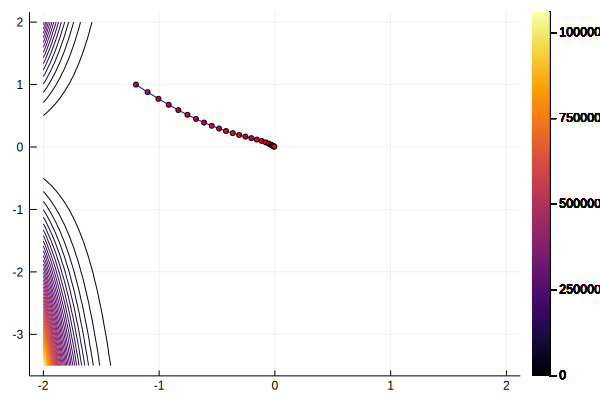

In [34]:
p

### Versão do Newton Puro sem plot

In [35]:
function newton_puro(nlp;
                     tol = 1e-6, kmax = 1000, max_evals = 10_000,
                     max_time = 30.0
                    )
    f(x) = obj(nlp, x)
    g(x) = grad(nlp, x)
    H(x) = Symmetric(hess(nlp, x), :L)
    x = copy(nlp.meta.x0)
    n = length(x)
    
    t0 = time()
    Dt = 0.0
    k = 0
    gx = g(x)
    
    sucesso = norm(gx) < tol
    cansado = k > kmax || Dt > max_time || sum_counters(nlp) > max_evals
    
    while !(sucesso || cansado)
        d = -H(x) \ gx
        x = x + d
        gx = g(x)
        k = k + 1
        
        Dt = time() - t0 # Tempo decorrido
        sucesso = norm(gx) < tol
        cansado = k > kmax || Dt > max_time || sum_counters(nlp) > max_evals
    end
    exitflag = "desconhecido"
    if sucesso
        exitflag = "sucesso"
    elseif cansado
        if k > kmax
            exitflag = "max iter"
        elseif Dt > max_time
            exitflag = "max tempo"
        else
            exitflag = "max evals"
        end
    end
    
    return x, f(x), norm(gx), Dt, k, exitflag
end

newton_puro (generic function with 2 methods)

In [36]:
problemas = CUTEst.select(max_var = 2, max_con = 0, only_free_var=true)
sort!(problemas)
mtds = [newton_puro]

@printf("%-10s | ", "Problema")
for mtd in mtds
    @printf("%27s | ", mtd)
end
println("")
@printf("%10s | ", "")
for mtd in mtds
    @printf("%9s  %8s  %6s | ",
            "f(x)", "Δt", "Σ#f")
end
println("")

np, nmtds = length(problemas), length(mtds)
fx_matriz = zeros(np, nmtds)
Δt_matriz = zeros(np, nmtds)
Σf_matriz = zeros(Int, np, nmtds)
for (i,p) in enumerate(problemas)
    @printf("%-10s | ", p)
    nlp = CUTEstModel(p)
    try
        for (j,mtd) in enumerate(mtds)
            try
                reset!(nlp)
                x, fx, normgx, Δt, iters, exitflag = mtd(nlp, max_evals = 10_000, max_time = 3.0)
                Σf = sum_counters(nlp)
                @printf("%+8.2e  %8.2e  %6d | ", fx, Δt, Σf)
                fx_matriz[i,j] = fx
                Δt_matriz[i,j] = Δt
                Σf_matriz[i,j] = Σf
            catch ex
                @printf("%27s | ", "ERROR")
                fx_matriz[i,j] = Inf
                Δt_matriz[i,j] = Inf
                Σf_matriz[i,j] = 2^16
            end
        end
        println("")
    catch ex
        println(ex)
    finally
        finalize(nlp)
    end
end

Problema   |                 newton_puro | 
           |      f(x)        Δt     Σ#f | 
AKIVA      | +6.17e+00  1.50e-02      14 | 
BEALE      |                       ERROR | 
BOXBODLS   | +9.77e+03  1.51e-02     394 | 
BRKMCC     | +1.69e-01  3.90e-04       8 | 
BROWNBS    | +0.00e+00  2.44e-02     660 | 
CLIFF      | +2.00e-01  2.17e-03      56 | 
CUBE       | +1.08e-23  5.42e-04      12 | 
DANWOODLS  | +4.32e-03  2.37e-03      18 | 
DENSCHNA   | +1.10e-23  6.43e-04      14 | 
DENSCHNB   |                       ERROR | 
DENSCHNC   | +2.18e-20  9.16e-04      22 | 
DENSCHNF   | +6.51e-22  6.33e-04      14 | 
DJTL       | +2.64e+10  7.62e-02    2004 | 
EXPFIT     | +2.41e+01  1.65e-03      40 | 
GBRAINLS   | +2.85e+01  1.31e-02      14 | 
HAIRY      | +7.46e+05  5.93e-02    2004 | 
HILBERTA   | +2.96e-31  2.21e-04       4 | 
HIMMELBB   | +6.68e-10  1.95e-03      50 | 
HIMMELBG   | +6.50e-01  4.65e-04      10 | 
HIMMELBH   |                       ERROR | 
HUMPS      | +1.17e+14  6.55e-02

Agora vamos criar uma implementação do método do Gradiente com busca de Armijo

## Método do Gradiente com Busca Inexata

1. Dados $x_0$, $\varepsilon > 0$, $k = 0$, $k_\max \in \mathbb{N}$, $\alpha, \sigma \in (0,1)$.
2. Enquanto $\Vert\nabla f(x_k)\Vert > \varepsilon$
    1. $d_k = -\nabla f(x_k)$
    2. Defina $t_k$ como o primeiro valor da sequência
        $\{1,\sigma,\sigma^2,\sigma^3,\dots\}$ tal que
$$f(x_k + t_k d_k) < f(x_k) + \alpha t_k \nabla f(x_k)^Td_k. $$
    3. Calcule $x_{k+1} = x_k + t_k d_k$
    4. $k = k + 1$
    5. Teste outras condições de parada e vá à 4 se alguma for satisfeita
3. Fim do Enquanto
4. Saída: $x_k$, $f(x_k)$, $\Vert\nabla f(x_k)\Vert$, Tempo, Iterações, exitflag

In [37]:
function gradiente_inexato(nlp;
                           tol = 1e-6, kmax = 1000, max_evals = 10_000, max_time = 30.0,
                           α = 1e-2, σ = 0.5, t_tol = 1e-12
                           )
    f(x) = obj(nlp, x)
    g(x) = grad(nlp, x)
    
    x = copy(nlp.meta.x0)
    n = length(x)
    
    t0 = time()
    Dt = 0.0
    k = 0
    
    fx = f(x)
    gx = g(x)
    
    sucesso = norm(gx) < tol
    cansado = k > kmax || Dt > max_time || sum_counters(nlp) > max_evals
    
    exitflag = "desconhecido"
    
    while !(sucesso || cansado)
        t = 1.0
        xt = x - gx
        ft = f(xt)
        incl = -dot(gx, gx)
        while !(ft < fx + α * t * incl)
            t *= σ
            if t < t_tol
                exitflag = "backtracking falhou"
                break
            end
            xt = x - t * gx
            ft = f(xt)
        end
        if exitflag != "desconhecido"
            break
        end
        x .= xt
        fx = ft
        gx = g(x)
        k = k + 1
        
        Dt = time() - t0 # Tempo decorrido
        sucesso = norm(gx) < tol
        cansado = k > kmax || Dt > max_time || sum_counters(nlp) > max_evals
    end
    
    if sucesso
        exitflag = "sucesso"
    elseif cansado
        if k > kmax
            exitflag = "max iter"
        elseif Dt > max_time
            exitflag = "max tempo"
        else
            exitflag = "max evals"
        end
    end
    
    return x, fx, norm(gx), Dt, k, exitflag
end

gradiente_inexato (generic function with 1 method)

In [38]:
nlp = CUTEstModel("HILBERTA")
out = gradiente_inexato(nlp)
finalize(nlp)
out

([6.7846e-6, -1.26771e-5], 6.795719174312875e-12, 9.45262358950014e-7, 0.0004761219024658203, 167, "sucesso")

In [39]:
nlp = CUTEstModel("HIMMELBB")
out = gradiente_inexato(nlp)
finalize(nlp)
out

([-8.92688e-9, -2.2731], 4.411189705727975e-15, 9.882936175636373e-7, 0.00028896331787109375, 49, "sucesso")

# Comparações entre algoritmos de otimização

In [40]:
problemas = CUTEst.select(max_var = 2, max_con = 0, only_free_var=true)
sort!(problemas)
mtds = [gradiente_inexato, newton_puro]

@printf("%-10s | ", "Problema")
for mtd in mtds
    @printf("%27s | ", mtd)
end
println("")
@printf("%10s | ", "")
for mtd in mtds
    @printf("%9s  %8s  %6s | ",
            "f(x)", "Δt", "Σ#f")
end
println("")

np, nmtds = length(problemas), length(mtds)
fx_matriz = zeros(np, nmtds)
Δt_matriz = zeros(np, nmtds)
Σf_matriz = zeros(Int, np, nmtds)
for (i,p) in enumerate(problemas)
    @printf("%-10s | ", p)
    nlp = CUTEstModel(p)
    try
        for (j,mtd) in enumerate(mtds)
            try
                reset!(nlp)
                x, fx, normgx, Δt, iters, exitflag = mtd(nlp, max_evals = 10_000, max_time = 3.0)
                Σf = sum_counters(nlp)
                @printf("%+8.2e  %8.2e  %6d | ", fx, Δt, Σf)
                fx_matriz[i,j] = fx
                Δt_matriz[i,j] = Δt
                Σf_matriz[i,j] = Σf
            catch ex
                @printf("%27s | ", "ERROR")
                fx_matriz[i,j] = Inf
                Δt_matriz[i,j] = Inf
                Σf_matriz[i,j] = 2^16
            end
        end
        println("")
    catch ex
        println(ex)
    finally
        finalize(nlp)
    end
end

Problema   |           gradiente_inexato |                 newton_puro | 
           |      f(x)        Δt     Σ#f |      f(x)        Δt     Σ#f | 
AKIVA      |     -Inf  5.51e-05      44 | +6.17e+00  1.39e-03      14 | 
BEALE      | +7.89e-13  1.30e-02    5138 |                       ERROR | 
BOXBODLS   | +9.77e+03  2.09e-04     153 | +9.77e+03  1.59e-02     394 | 
BRKMCC     | +1.69e-01  8.45e-04    1163 | +1.69e-01  3.84e-04       8 | 
BROWNBS    | +2.50e+11  7.44e-03   10014 | +0.00e+00  2.93e-02     660 | 
CLIFF      | +2.01e-01  4.62e-03    6046 | +2.00e-01  2.21e-03      56 | 
CUBE       | +3.83e-03  7.17e-03   10001 | +1.08e-23  8.15e-04      12 | 
DANWOODLS  | +3.02e-01  2.94e-02   10007 | +4.32e-03  9.62e-04      18 | 
DENSCHNA   | +3.34e-13  2.45e-04     133 | +1.10e-23  8.35e-04      14 | 
DENSCHNB   | +0.00e+00  1.50e-05       9 |                       ERROR | 
DENSCHNC   | +1.83e-01  1.13e-03     777 | +2.18e-20  1.28e-03      22 | 
DENSCHNF   | +6.81e-16  1.54e-04     22

Além de verificar o tempo ou avaliações de função, devemos garantir que os métodos funcionaram. Uma maneira de verificar isso, neste caso, é decidir que um algoritmo convergiu para a solução ótima se
$$ f \leq f_{\min} + \left\vert f_{\min}\right\vert \varepsilon_{R} + \varepsilon_{A},$$
onde $f$ é o valor de função de um algoritmo, $f_{\min}$ é o menor valor de função encontrado por qualquer algoritmo, e $\varepsilon_R$ e $\varepsilon_A$ são tolerâncias. Por exemplo, $\varepsilon_{R} = 10^{-3}$
e $\varepsilon_{A} = 10^{-6}$.

In [41]:
@printf("%-10s | ", "Problema")
for mtd in mtds
    @printf("%27s | ", mtd)
end
println("")
@printf("%10s | ", "")
for mtd in mtds
    @printf("%9s  %8s  %6s | ",
            "f(x)", "Δt", "Σ#f")
end
println("")

epsR, epsA = 1e-3, 1e-6
for i = 1:np
    @printf("%-10s | ", problemas[i])
    fmin = minimum(fx_matriz[i,:])
    for j = 1:nmtds
        fx, Δt, Σf = fx_matriz[i,j], Δt_matriz[i,j], Σf_matriz[i,j]
        if fx < fmin + abs(fmin) * epsR + epsA
            @printf("%+8.2e  %8.2e  %6d | ", fx, Δt, Σf)
        else
            @printf("%27s | ", "Falhou")
        end
    end
    println("")
end

Problema   |           gradiente_inexato |                 newton_puro | 
           |      f(x)        Δt     Σ#f |      f(x)        Δt     Σ#f | 
AKIVA      |                      Falhou |                      Falhou | 
BEALE      | +7.89e-13  1.30e-02    5138 |                      Falhou | 
BOXBODLS   | +9.77e+03  2.09e-04     153 | +9.77e+03  1.59e-02     394 | 
BRKMCC     | +1.69e-01  8.45e-04    1163 | +1.69e-01  3.84e-04       8 | 
BROWNBS    |                      Falhou | +0.00e+00  2.93e-02     660 | 
CLIFF      |                      Falhou | +2.00e-01  2.21e-03      56 | 
CUBE       |                      Falhou | +1.08e-23  8.15e-04      12 | 
DANWOODLS  |                      Falhou | +4.32e-03  9.62e-04      18 | 
DENSCHNA   | +3.34e-13  2.45e-04     133 | +1.10e-23  8.35e-04      14 | 
DENSCHNB   | +0.00e+00  1.50e-05       9 |                      Falhou | 
DENSCHNC   |                      Falhou | +2.18e-20  1.28e-03      22 | 
DENSCHNF   | +6.81e-16  1.54e-04     2

Outro ponto de comparação é a velocidade de Newton quando funciona. Ele faz uma troca de **eficiência** por **robustez**. Isso fica pouco evidente na tabela acima, então vamos usar um gráfico específico.

## Perfil de Desempenho

O perfil de desempenho é um gráfico de comparação de algoritmos útil quando existe uma troca de eficiência e robustez.

O pacote `BenchmarkProfiles` tem um perfil de desempenho implementado.

In [42]:
using BenchmarkProfiles

epsR, epsA = 1e-3, 1e-6
np = size(fx_matriz, 1)
funcionou = fill(false, np, nmtds)
for i = 1:np
    fmin = minimum(fx_matriz[i,:])
    for j = 1:nmtds
        fx, Δt, Σf = fx_matriz[i,j], Δt_matriz[i,j], Σf_matriz[i,j]
        funcionou[i,j] = fx < fmin + abs(fmin) * epsR + epsA
    end
end

P = Δt_matriz + (.!funcionou) * Inf # Um truque para criar os Inf que precisamos

36×2 Array{Float64,2}:
 Inf            Inf          
   0.0130169    Inf          
   0.000209093    0.0158789  
   0.000844955    0.000383854
 Inf              0.0292909  
 Inf              0.002213   
 Inf              0.000814915
 Inf              0.000962019
   0.000244856    0.000834942
   1.50204e-5   Inf          
 Inf              0.00127792 
   0.000154018    0.000651836
   0.00830793   Inf          
   ⋮                         
 Inf              0.00201607 
   0.00298309   Inf          
   0.000985146  Inf          
   0.000437021  Inf          
   0.000692844  Inf          
   0.00499201   Inf          
 Inf              0.000702858
   0.000174999    0.00122809 
 Inf              0.000365019
   0.00283909     0.00127196 
   4.29153e-5   Inf          
   8.70228e-5     0.000217915

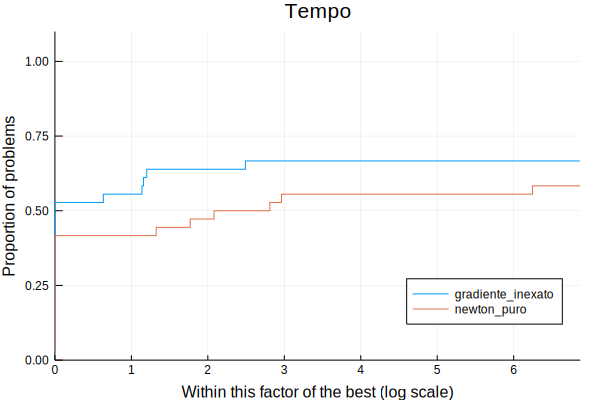

In [43]:
P = Δt_matriz + (.!funcionou) * Inf
performance_profile(P, string.(mtds), leg=:bottomright)
title!("Tempo")

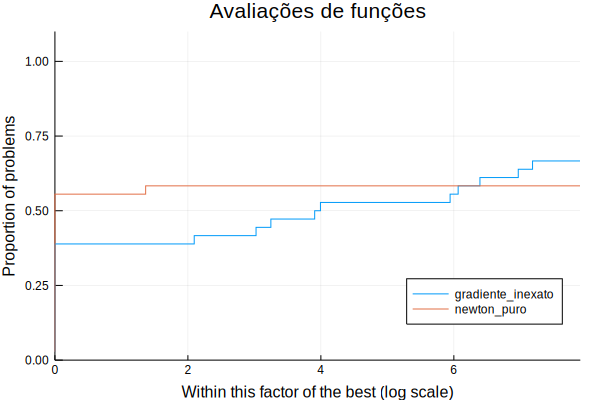

In [44]:
P = Σf_matriz + (.!funcionou) * Inf
performance_profile(P, string.(mtds), leg=:bottomright)
title!("Avaliações de funções")